In [38]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# ___Associations with Multivariate Categorical Data___
-----------------

## ___Multivariate Categorical Data___

In [1]:
# Imagine a survey;
# You aks the public a set of questions.
    # Gender?
    # Marital status?
    
# In this case the collcted data is bivariate (the simplest type of multivariate)

In [2]:
# We can add more questions though,
    # Highest educational status
    # Age grouping

In [3]:
# Multivariate data is inherently more complex to make sense of by observation, compared to univariate data.
# Tabulation (frequency tables) can help us make sense of distributions in multivariate data.

In [8]:
countries = pd.read_csv(r"./countries.csv")

In [10]:
countries.head()

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,west_and_rest,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,Abkhazia,NaN,NaN,False,NaN,NaN,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,...,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AW,NaN,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,...,Afghanistan,un_least_developed,un_central_and_southern_asia,True,unhcr_asia_pacific,sa,AF,rest,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,...,Angola,un_least_developed,un_sub_saharan_africa,True,unhcr_southern_africa,ssa,AO,rest,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,...,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AI,NaN,americas,america


In [29]:
countries.columns

Index(['country', 'g77_and_oecd_countries', 'income_3groups', 'income_groups',
       'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'name', 'un_sdg_ldc', 'un_sdg_region', 'un_state',
       'unhcr_region', 'unicef_region', 'unicode_region_subtag',
       'west_and_rest', 'world_4region', 'world_6region'],
      dtype='object')

In [15]:
# Frequency table

Counter(countries.income_groups.dropna())

Counter({'high_income': 80,
         'low_income': 31,
         'lower_middle_income': 47,
         'upper_middle_income': 60})

## ___Research question: What factors influence the national income of countries?___
---------------------

In [23]:
# To discern the influence of one factor on another, one needs to filter the first by the groups in the second
# and prepare summaries

# Let's see the influence of being a western nation on income

west = countries.query("west_and_rest == 'west'").income_groups.dropna()
rest = countries.query("west_and_rest == 'rest'").income_groups.dropna()

In [26]:
# There are literally no western country below the high_income margin.

Counter(west)

Counter({'high_income': 25})

In [27]:
# The summary for non-western nations.

Counter(rest)

Counter({'low_income': 31,
         'lower_middle_income': 47,
         'upper_middle_income': 58,
         'high_income': 33})

In [30]:
countries.un_state.unique()

array([False,  True])

In [40]:
# The influence of world region on being a UN member state 

un_members = countries.query("un_state == True").world_6region.dropna()
non_members = countries.query("un_state == False").world_6region.dropna()

In [52]:
countries.world_6region.dropna().unique()

array(['europe_central_asia', 'america', 'south_asia',
       'sub_saharan_africa', 'middle_east_north_africa',
       'east_asia_pacific'], dtype=object)

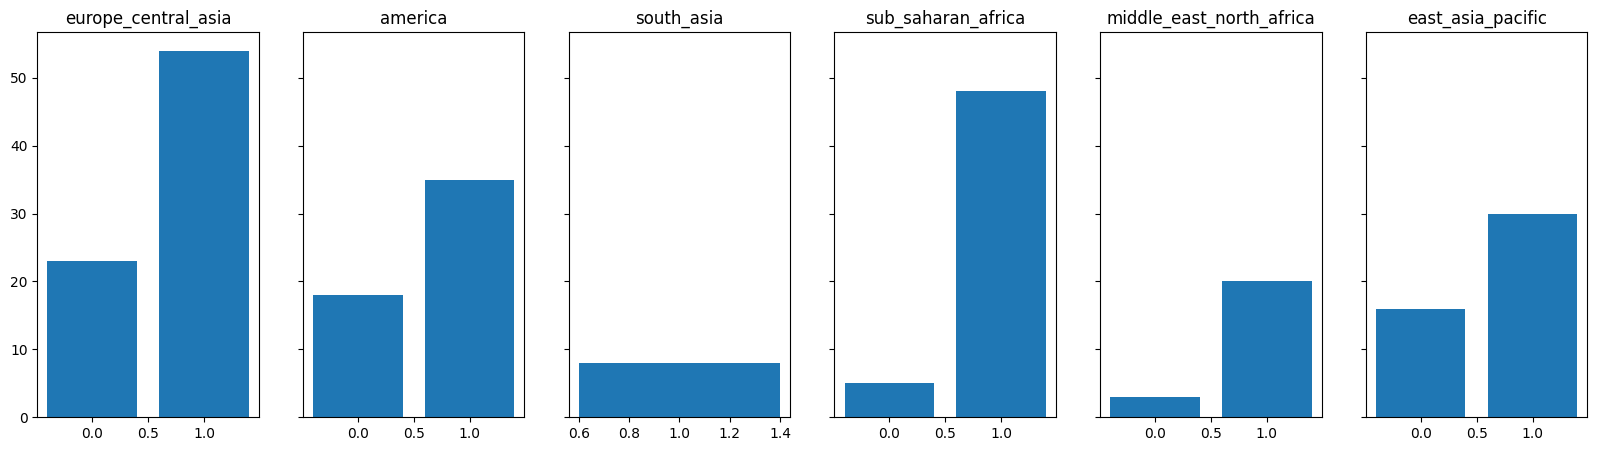

In [64]:
# Visualize this info in bar charts

regions = countries.world_6region.dropna().unique()

fig, *axes = plt.subplots(ncols = len(regions), sharey = True)
fig.set_size_inches(20, 5)

for (i, region) in enumerate(regions):
    data = countries.query("world_6region == @region").un_state.dropna().value_counts()
    axes[0][i].bar(x = data.index, height = data.values)
    axes[0][i].set_title(region)

plt.show()

In [ ]:
# There are also mosaic charts where each group is denoted by a shape whose area is proportional to it's frequency
# Less informative and more confusing
# Similar to Excel's Treemap charts in apperance.